## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [45]:
try:
    from sklearn.model_selection import train_test_split
except ImportError:
    from sklearn.cross_validation import train_test_split

In [46]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline


df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [40]:
!conda rm sklearn.model_selection

usage: conda [-h] [-V] command ...
conda: error: argument command: invalid choice: '/Users/ygao940/anaconda2/bin/conda' (choose from u'info', u'help', u'list', u'search', u'create', u'install', u'update', u'upgrade', u'remove', u'uninstall', u'config', u'clean', u'package')



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

/Users/ygao940/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11a20c510>,
 'caps': [<matplotlib.lines.Line2D at 0x11a21b450>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a227750>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a227110>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11a20c710>,
  <matplotlib.lines.Line2D at 0x11a27a290>]}

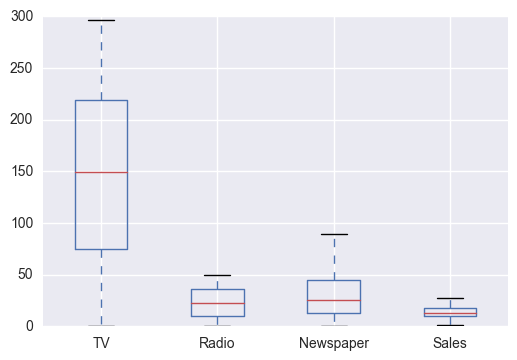

In [5]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

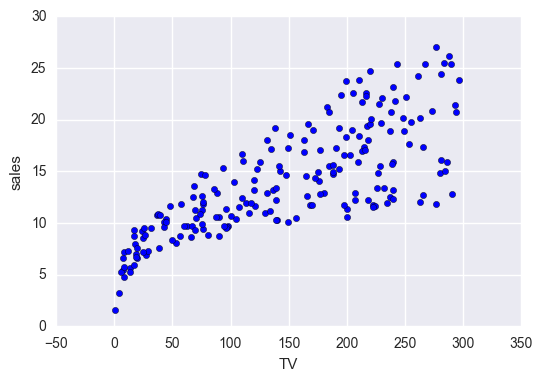

In [15]:
plt.scatter(df.TV,df.Sales)
plt.xlabel('TV')
plt.ylabel('sales')

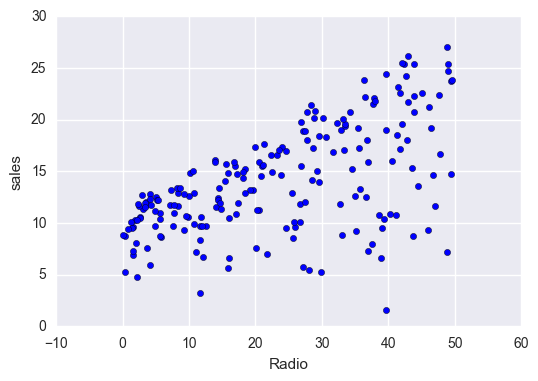

In [16]:
plt.scatter(df.Radio,df.Sales)
plt.xlabel('Radio')
plt.ylabel('sales')

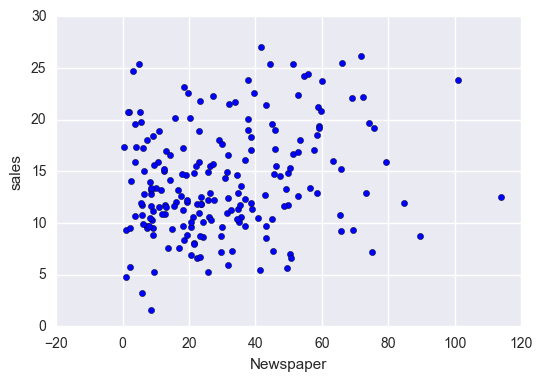

In [17]:
plt.scatter(df.Newspaper,df.Sales)
plt.xlabel('Newspaper')
plt.ylabel('sales')

In [2]:
from pandas.tools.plotting import scatter_matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119b74410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a9d27d0>]], dtype=object)

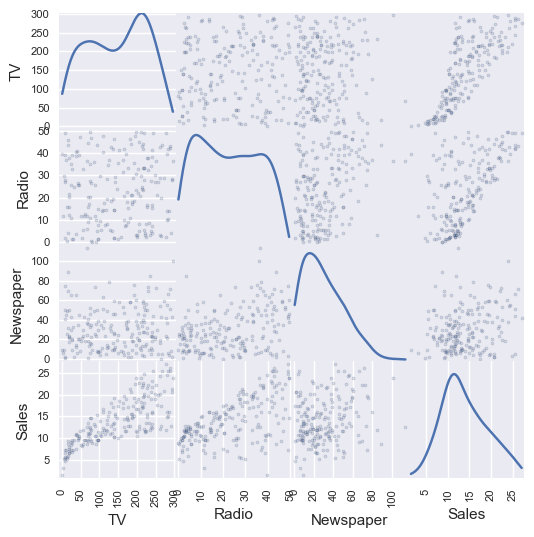

In [20]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

Which of the variables seem correlated with one another? Which don't? Explain your answer

TV and sales seem to be correlated since their scatter plot nearly linear, meaning that there might be a linaer relationship between these two variables.

The scatter plot between radio and sales also seems to be linear so we can guess that radio and sales also correlate to each other.

On the other hand, the scatter plot of newspaper and sales does not look like a line. Thus, there is no strong correlation between newspaper and sales.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [3]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [4]:
y = df.Sales

b) Set X to be just the features described above in df

In [17]:
X = df[['TV','Radio','Newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [47]:
size = 200
# Split X,Y into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

d) Train model on training data, and make predictions on testing data

In [48]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

prediction = regr.predict(X_test)
# The prediction on testing data will be ploted in (f)

('Coefficients: \n', array([ 0.04426396,  0.1925516 , -0.00161403]))
Residual sum of squares: 4.88
Variance score: 0.84


e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [49]:
print('R^2: %.2f' % regr.score(X_test, y_test))

R^2: 0.84


The model is good. $R^{2}$ is 0.90, meaning that 90% data has been fitted in this model.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

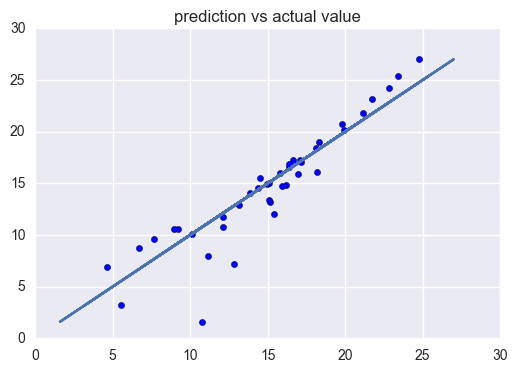

In [50]:
plt.title('prediction vs actual value')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)

Yes. Most predictions are fitted on or near the line, whic indicates the model is good.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [51]:
print regr.coef_
print df

[ 0.04426396  0.1925516  -0.00161403]
        TV  Radio  Newspaper  Sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
6      8.7   48.9       75.0    7.2
7     57.5   32.8       23.5   11.8
8    120.2   19.6       11.6   13.2
9      8.6    2.1        1.0    4.8
10   199.8    2.6       21.2   10.6
11    66.1    5.8       24.2    8.6
12   214.7   24.0        4.0   17.4
13    23.8   35.1       65.9    9.2
14    97.5    7.6        7.2    9.7
15   204.1   32.9       46.0   19.0
16   195.4   47.7       52.9   22.4
17    67.8   36.6      114.0   12.5
18   281.4   39.6       55.8   24.4
19    69.2   20.5       18.3   11.3
20   147.3   23.9       19.1   14.6
21   218.4   27.7       53.4   18.0
22   237.4    5.1       23.5   12.5
23    13.2   15.9       49.6    5.6
24   228.3   16.9       26.2   15.5
25    62.3   12.6       18.3    9.7
26   262.9    3.5       19

Notice Newspaper has smallest coefficient (absolute) among three variables. So newspaper is the least important feature in this model and the change of Newspaper would make smallest impact on Sales. On the other hand, Radio has largest coefficient in this model. Thus, if there is a change of Radio, it would make a great impact on sales.

We need to check if three variables are correlated before making any conclusion.

h) What can you conclude from g) - can you think of a way to interpret the result?

We can check the correlation first before interpreting the result.

In [52]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Notice that the correlation coefficient between newspaper and radio is much bigger than the others. So there might be some interactions between newspaper and radio. 

Assume there is not strong correlation between newspaper and radio.

From d), we can conclude that there are positive relationships between TV and sales, and Radio and sales. If there is 1 unit increase for TV and Radio, the sales would increase by 0.047 and 0.180 respectively. 

On the other hand, the negative coefficient for newspaper indicates there is a negative relationship betwee nnespaper and sales. Hence, if there is 1 unit increase of newspaper, the sale would decrease 0.0009, which is a fairly small effect.

### Bonus: How could you have improved performance?

In [53]:
# Type your anser here. 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0.1, m = 0.1, error = 4839.38930573
Running...
After 100 iterations b = 0.132997706511, m = 1.47687807599, error = 112.588593887


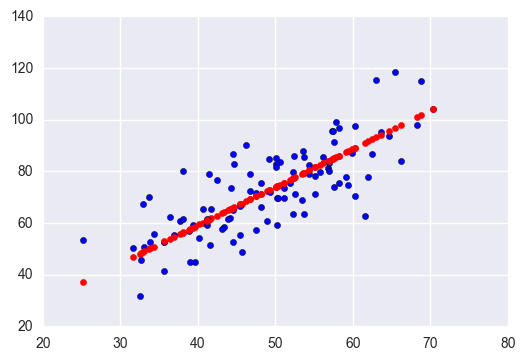

In [54]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("./desktop/4990/APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0.1 # initial y-intercept guess
    initial_m = 0.1 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0.1, m = 0.1, error = 4839.38930573
Running...
After 0 iterations b = 0.1, m = 0.1, error = 4839.38930573


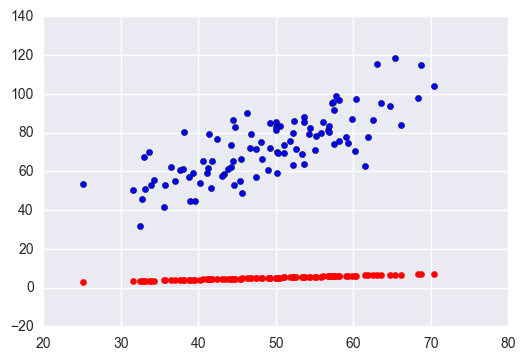

Starting gradient descent at b = 0.1, m = 0.1, error = 4839.38930573
Running...
After 1 iterations b = 0.113547843282, m = 0.786271906748, error = 1301.93895362


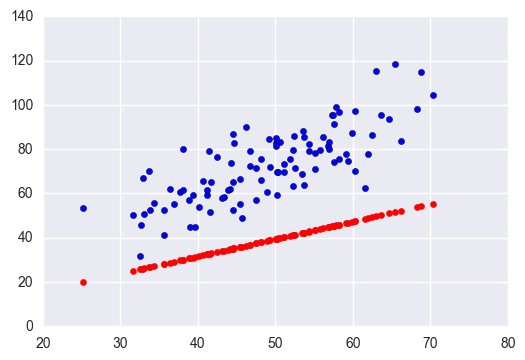

Starting gradient descent at b = 0.1, m = 0.1, error = 4839.38930573
Running...
After 2 iterations b = 0.120373230125, m = 1.13051582054, error = 411.85303054


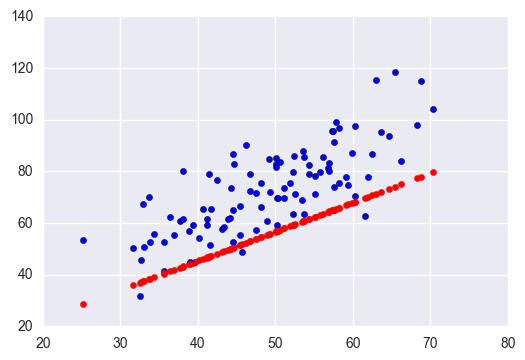

Starting gradient descent at b = 0.1, m = 0.1, error = 4839.38930573
Running...
After 3 iterations b = 0.123826529676, m = 1.30319325664, error = 187.891436332


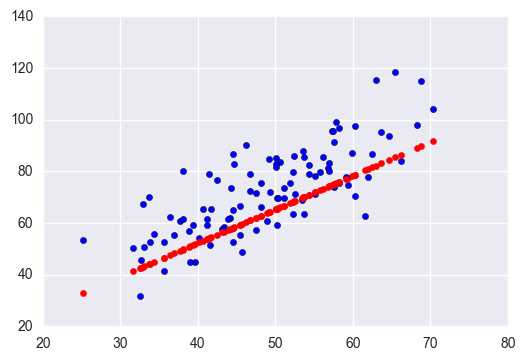

Starting gradient descent at b = 0.1, m = 0.1, error = 4839.38930573
Running...
After 4 iterations b = 0.125588338391, m = 1.38981032086, error = 131.538659653


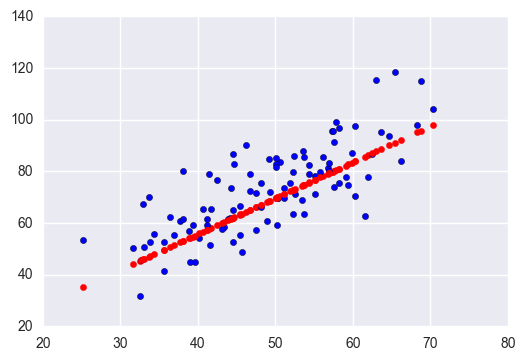

Starting gradient descent at b = 0.1, m = 0.1, error = 4839.38930573
Running...
After 5 iterations b = 0.126501669183, m = 1.43325818498, error = 117.359264872


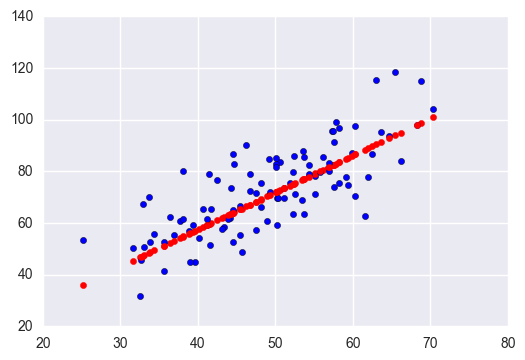

Starting gradient descent at b = 0.1, m = 0.1, error = 4839.38930573
Running...
After 6 iterations b = 0.126989390235, m = 1.45505171741, error = 113.791448689


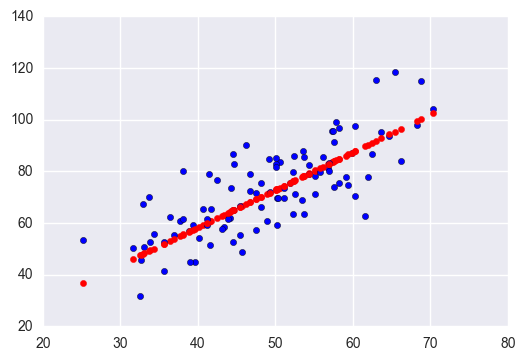

Starting gradient descent at b = 0.1, m = 0.1, error = 4839.38930573
Running...
After 7 iterations b = 0.127263618703, m = 1.46598310555, error = 112.893695831


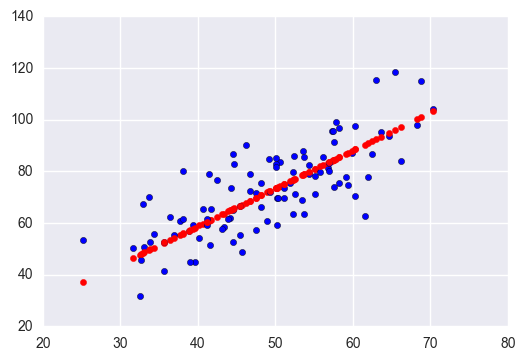

Starting gradient descent at b = 0.1, m = 0.1, error = 4839.38930573
Running...
After 8 iterations b = 0.127430755798, m = 1.47146587581, error = 112.667778753


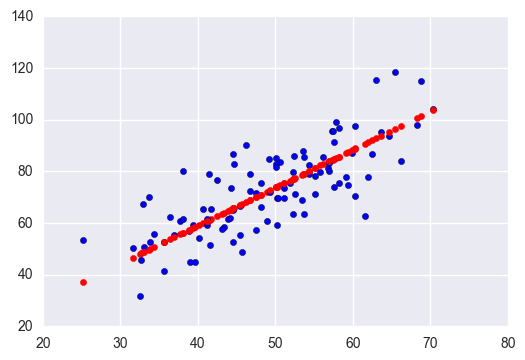

Starting gradient descent at b = 0.1, m = 0.1, error = 4839.38930573
Running...
After 9 iterations b = 0.127544173998, m = 1.47421553594, error = 112.610907595


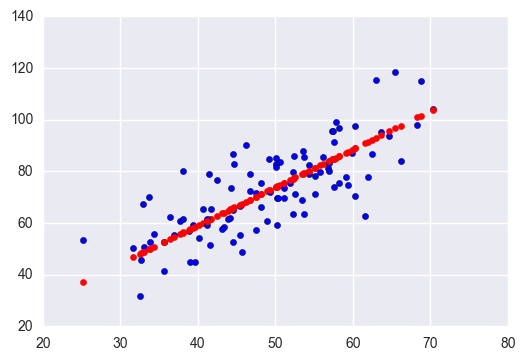

In [55]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()
